<a href="https://colab.research.google.com/github/Mariammmmmmm/modeling_labs/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%961_%D0%BF%D0%BE_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D1%8E_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Рстакян Мариам 

In [1]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 48 kB/s 
     |████████████████████████████████| 199 kB 41.7 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=2f92795bafcc79943d447f3f42ee999c231ef6b0698d5cea011cb7f24ba66e0f
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [2]:
import pyspark
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName('Dataframe').getOrCreate()
spark

In [5]:
part0 = spark.read.parquet('part_0.parquet')
part0 = part0.dropna()
part1 = spark.read.parquet('part_1.parquet')
part1 = part1.dropna()
part2 = spark.read.parquet('part_2.parquet')
part2 = part2.dropna()
part3 = spark.read.parquet('part_3.parquet')
part3 = part3.dropna()
part4 = spark.read.parquet('part_4.parquet')
part4 = part4.dropna()
part0 = part0.union(part1).union(part2).union(part3).union(part4)
part0 = part0.dropna()
part0.show(5)

+-------+-------------------+--------+--------------+---------+--------------+--------------------+--------------+--------------+-----------+---+-------+----+------------+-----------+----+-----------+----------+---------+------------------+-----------------+
| app_id|               amnt|currency|operation_kind|card_type|operation_type|operation_type_group|ecommerce_flag|payment_system|income_flag|mcc|country|city|mcc_category|day_of_week|hour|days_before|weekofyear|hour_diff|transaction_number|__index_level_0__|
+-------+-------------------+--------+--------------+---------+--------------+--------------------+--------------+--------------+-----------+---+-------+----+------------+-----------+----+-----------+----------+---------+------------------+-----------------+
|1063620| 0.3676867203808272|       1|             1|        5|             2|                   1|             2|             2|          1| 28|      1|   1|          16|          4|  23|        359|        46|       -1|  

In [6]:
part0.count()

17314359

In [7]:
part0 = part0.filter("amnt != 0")
part0.count()

17073621

In [8]:
years_data_df = part0.groupBy("days_before","app_id").count()
years_data_df.show(5)

+-----------+-------+-----+
|days_before| app_id|count|
+-----------+-------+-----+
|        276|1063623|    2|
|        256|1063623|    2|
|        110|1063623|    2|
|         75|1063623|    1|
|        135|1063629|    1|
+-----------+-------+-----+
only showing top 5 rows



In [9]:
years_data_df.write.parquet("years_data_df/years_data_df.parquet")

In [10]:
pivot_years_df = years_data_df.groupBy('app_id').pivot('days_before').sum("count") 
pivot_years_df.show(5)

+-------+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+-

In [11]:
pivot_years_df.count()

51155

In [12]:
pivot_years_df = pivot_years_df.na.fill(0)
pivot_years_df.show(5)

+-------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---

In [13]:
cols = []
for i in range(359):
  a = str(i+1)
  cols.append(a)

In [14]:
from pyspark.ml.linalg import Vector
from pyspark.ml.feature import VectorAssembler
vec_assemb = VectorAssembler(inputCols=cols, outputCol="years_day")
final_data = vec_assemb.transform(pivot_years_df)
#final_data = final_data.select("app_id","years_day")
final_data.show(10)

+-------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---

In [15]:
pivot_years_df.select('app_id').distinct().count()

51155

In [16]:
pivot_years_df.count()

51155

Нормализация данных

In [28]:
from pyspark.ml.feature import StandardScaler
scaler = StandardScaler(inputCol="years_day", outputCol="scaled_years_day", withStd=True, withMean=False)
scaled_model = scaler.fit(final_data)
cluster_df = scaled_model.transform(final_data)
cluster_df.show(5)

+-------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---

In [29]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
kmeans = KMeans(featuresCol="years_day", k=3)
model = kmeans.fit(cluster_df)
model.transform(cluster_df).groupBy("prediction").count().show(5)

+----------+-----+
|prediction|count|
+----------+-----+
|         1| 3577|
|         2|13794|
|         0|33784|
+----------+-----+



In [30]:
predictions = model.transform(cluster_df)
predictions.show(5)

+-------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---

In [31]:
predictions.groupBy("app_id", "prediction").count().show(5)

+-------+----------+-----+
| app_id|prediction|count|
+-------+----------+-----+
|1064231|         0|    1|
|1088710|         0|    1|
|1102524|         0|    1|
|1101723|         2|    1|
|1100329|         0|    1|
+-------+----------+-----+
only showing top 5 rows



In [39]:
cols.append('prediction')
pred = predictions.select(cols)
pred.show()

+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---

In [ ]:
centers = model.clusterCenters()
for center in centers:
  print(center)

In [42]:
import numpy as np
cent = np.array(centers).T
cent

array([[0.54850647, 3.90812622, 1.87162015],
       [0.53938838, 3.73024295, 1.80333454],
       [0.5219219 , 3.68277018, 1.79166365],
       ...,
       [0.31679446, 3.19631388, 1.38231243],
       [0.25308624, 2.86260821, 1.12497282],
       [0.25042186, 2.81178442, 1.09148242]])

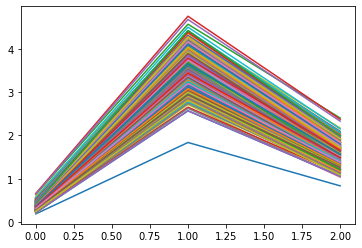

In [46]:
from matplotlib import pyplot as plt
plt.plot(centers)

In [47]:
week_data_df = part0.groupBy("day_of_week","app_id").count()
week_data_df.show(5)

+-----------+-------+-----+
|day_of_week| app_id|count|
+-----------+-------+-----+
|          7|1063641|    3|
|          4|1063657|   28|
|          6|1063665|   82|
|          4|1063671|  100|
|          7|1063675|   13|
+-----------+-------+-----+
only showing top 5 rows



In [48]:
pivot_week_df = week_data_df.groupBy('app_id').pivot('day_of_week').sum("count") 
pivot_week_df.show(5)

+-------+---+---+---+---+---+---+---+
| app_id|  1|  2|  3|  4|  5|  6|  7|
+-------+---+---+---+---+---+---+---+
|1071712| 53| 53| 41| 46| 43| 31| 29|
|1064423|  4|  7|  3|  5| 11| 10| 12|
|1065595| 26| 25| 53| 55| 64| 48| 32|
|1068695|  7|  6|  9|  8| 22| 13|  4|
|1070197| 88| 90| 89|105|101| 71| 80|
+-------+---+---+---+---+---+---+---+
only showing top 5 rows



In [49]:
pivot_week_df.count()

51155

In [52]:
pivot_week_df = pivot_week_df.na.fill(0)
pivot_week_df.show(5)

+-------+---+---+---+---+---+---+---+
| app_id|  1|  2|  3|  4|  5|  6|  7|
+-------+---+---+---+---+---+---+---+
|1071712| 53| 53| 41| 46| 43| 31| 29|
|1064423|  4|  7|  3|  5| 11| 10| 12|
|1065595| 26| 25| 53| 55| 64| 48| 32|
|1068695|  7|  6|  9|  8| 22| 13|  4|
|1070197| 88| 90| 89|105|101| 71| 80|
+-------+---+---+---+---+---+---+---+
only showing top 5 rows



In [51]:
cols = []
for i in range(7):
  a = str(i+1)
  cols.append(a)

In [53]:
from pyspark.ml.linalg import Vector
from pyspark.ml.feature import VectorAssembler
vec_assemb = VectorAssembler(inputCols=cols, outputCol="week_day")
final_data = vec_assemb.transform(pivot_week_df)
final_data.show(10)

+-------+---+---+---+---+---+---+---+--------------------+
| app_id|  1|  2|  3|  4|  5|  6|  7|            week_day|
+-------+---+---+---+---+---+---+---+--------------------+
|1071712| 53| 53| 41| 46| 43| 31| 29|[53.0,53.0,41.0,4...|
|1064423|  4|  7|  3|  5| 11| 10| 12|[4.0,7.0,3.0,5.0,...|
|1065595| 26| 25| 53| 55| 64| 48| 32|[26.0,25.0,53.0,5...|
|1068695|  7|  6|  9|  8| 22| 13|  4|[7.0,6.0,9.0,8.0,...|
|1070197| 88| 90| 89|105|101| 71| 80|[88.0,90.0,89.0,1...|
|1066848|  4| 31| 20|  7| 14|  7|  9|[4.0,31.0,20.0,7....|
|1069475| 44| 50| 50| 33| 35| 40| 44|[44.0,50.0,50.0,3...|
|1069542| 31| 35| 25| 25| 31| 22| 38|[31.0,35.0,25.0,2...|
|1064231| 45| 50| 31| 27| 23| 26| 27|[45.0,50.0,31.0,2...|
|1074329| 83|104|104| 71| 57| 65|114|[83.0,104.0,104.0...|
+-------+---+---+---+---+---+---+---+--------------------+
only showing top 10 rows



Нормализация данных

In [55]:
from pyspark.ml.feature import StandardScaler
scaler = StandardScaler(inputCol="week_day", outputCol="scaled_week_day", withStd=True, withMean=False)
scaled_model = scaler.fit(final_data)
cluster_df = scaled_model.transform(final_data)
cluster_df.show(5)

+-------+---+---+---+---+---+---+---+--------------------+--------------------+
| app_id|  1|  2|  3|  4|  5|  6|  7|            week_day|     scaled_week_day|
+-------+---+---+---+---+---+---+---+--------------------+--------------------+
|1071712| 53| 53| 41| 46| 43| 31| 29|[53.0,53.0,41.0,4...|[0.91687915901557...|
|1064423|  4|  7|  3|  5| 11| 10| 12|[4.0,7.0,3.0,5.0,...|[0.06919842709551...|
|1065595| 26| 25| 53| 55| 64| 48| 32|[26.0,25.0,53.0,5...|[0.44978977612084...|
|1068695|  7|  6|  9|  8| 22| 13|  4|[7.0,6.0,9.0,8.0,...|[0.12109724741715...|
|1070197| 88| 90| 89|105|101| 71| 80|[88.0,90.0,89.0,1...|[1.52236539610133...|
+-------+---+---+---+---+---+---+---+--------------------+--------------------+
only showing top 5 rows



In [56]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
kmeans = KMeans(featuresCol="week_day", k=3)
model = kmeans.fit(cluster_df)
model.transform(cluster_df).groupBy("prediction").count().show(5)

+----------+-----+
|prediction|count|
+----------+-----+
|         1| 3470|
|         2|13670|
|         0|34015|
+----------+-----+



In [57]:
predictions = model.transform(cluster_df)
predictions.show(5)

+-------+---+---+---+---+---+---+---+--------------------+--------------------+----------+
| app_id|  1|  2|  3|  4|  5|  6|  7|            week_day|     scaled_week_day|prediction|
+-------+---+---+---+---+---+---+---+--------------------+--------------------+----------+
|1071712| 53| 53| 41| 46| 43| 31| 29|[53.0,53.0,41.0,4...|[0.91687915901557...|         0|
|1064423|  4|  7|  3|  5| 11| 10| 12|[4.0,7.0,3.0,5.0,...|[0.06919842709551...|         0|
|1065595| 26| 25| 53| 55| 64| 48| 32|[26.0,25.0,53.0,5...|[0.44978977612084...|         0|
|1068695|  7|  6|  9|  8| 22| 13|  4|[7.0,6.0,9.0,8.0,...|[0.12109724741715...|         0|
|1070197| 88| 90| 89|105|101| 71| 80|[88.0,90.0,89.0,1...|[1.52236539610133...|         2|
+-------+---+---+---+---+---+---+---+--------------------+--------------------+----------+
only showing top 5 rows



In [58]:
predictions.groupBy("app_id", "prediction").count().show(5)

+-------+----------+-----+
| app_id|prediction|count|
+-------+----------+-----+
|1064231|         0|    1|
|1088710|         0|    1|
|1102524|         0|    1|
|1101723|         2|    1|
|1100329|         0|    1|
+-------+----------+-----+
only showing top 5 rows



In [59]:
cols.append('prediction')
pred = predictions.select(cols)
pred.show()

+---+---+---+---+---+---+---+----------+
|  1|  2|  3|  4|  5|  6|  7|prediction|
+---+---+---+---+---+---+---+----------+
| 53| 53| 41| 46| 43| 31| 29|         0|
|  4|  7|  3|  5| 11| 10| 12|         0|
| 26| 25| 53| 55| 64| 48| 32|         0|
|  7|  6|  9|  8| 22| 13|  4|         0|
| 88| 90| 89|105|101| 71| 80|         2|
|  4| 31| 20|  7| 14|  7|  9|         0|
| 44| 50| 50| 33| 35| 40| 44|         0|
| 31| 35| 25| 25| 31| 22| 38|         0|
| 45| 50| 31| 27| 23| 26| 27|         0|
| 83|104|104| 71| 57| 65|114|         2|
| 18|  8| 13| 20| 17| 16| 12|         0|
|279|185|272|284|235|260|127|         1|
|  8|  7|  6|  5|  7| 16|  9|         0|
| 15| 10| 26| 11| 13| 22| 11|         0|
| 53| 48| 57| 50| 62| 30| 67|         2|
| 79| 74|115| 92|104| 76| 59|         2|
| 21|  9|  9|  8|  8|  8| 15|         0|
| 71| 62| 68| 53| 66| 51| 43|         2|
| 12| 14| 10|  9| 11|  6|  5|         0|
|187|248|163|182|214|194|268|         1|
+---+---+---+---+---+---+---+----------+
only showing top

In [62]:
centers = model.clusterCenters()
cent = np.array(centers).T

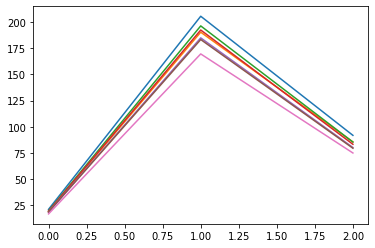

In [65]:
from matplotlib import pyplot as plt
plt.plot(centers)

In [66]:
hour_data_df = part0.groupBy("hour","app_id").count()
hour_data_df.show(5)

+----+-------+-----+
|hour| app_id|count|
+----+-------+-----+
|   8|1063638|   12|
|  16|1063639|   23|
|   7|1063641|    4|
|  19|1063644|   17|
|  22|1063654|   15|
+----+-------+-----+
only showing top 5 rows



In [67]:
pivot_hour_df = hour_data_df.groupBy('app_id').pivot('hour').sum("count") 
pivot_hour_df.show(5)

+-------+----+----+----+----+----+----+----+----+----+---+---+---+---+---+---+---+---+---+---+---+----+----+----+----+
| app_id|   0|   1|   2|   3|   4|   5|   6|   7|   8|  9| 10| 11| 12| 13| 14| 15| 16| 17| 18| 19|  20|  21|  22|  23|
+-------+----+----+----+----+----+----+----+----+----+---+---+---+---+---+---+---+---+---+---+---+----+----+----+----+
|1064359|   7|   3|   5|   8|   6|   3|   1|   2|  15|  7| 11|  7| 16| 21| 18| 28| 23| 24| 23| 38|  34|  81|  30|   3|
|1064423|null|null|null|null|null|null|null|null|null|  1|  2|  3|  1|  2|  6|  9| 10| 16|  1|  1|null|null|null|null|
|1069167|   1|null|null|null|null|null|null|   2|   2|  7| 11| 15| 18| 17| 20| 29| 31| 40| 26| 17|  14|   3|   4|   4|
|1070197|   1|   1|null|null|   1|null|null|null|  10| 22| 42| 32| 43| 78| 48| 65| 30| 33| 39| 35|  46|  93|   4|   1|
|1071712|   1|null|null|   1|   1|null|null|  20|   1|  6| 15| 10| 15| 13| 17| 10| 71| 70| 26| 15|   2|   1|null|   1|
+-------+----+----+----+----+----+----+----+----

In [68]:
pivot_hour_df = pivot_hour_df.na.fill(0)
pivot_hour_df.show(5)

+-------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
| app_id|  0|  1|  2|  3|  4|  5|  6|  7|  8|  9| 10| 11| 12| 13| 14| 15| 16| 17| 18| 19| 20| 21| 22| 23|
+-------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|1064359|  7|  3|  5|  8|  6|  3|  1|  2| 15|  7| 11|  7| 16| 21| 18| 28| 23| 24| 23| 38| 34| 81| 30|  3|
|1064423|  0|  0|  0|  0|  0|  0|  0|  0|  0|  1|  2|  3|  1|  2|  6|  9| 10| 16|  1|  1|  0|  0|  0|  0|
|1069167|  1|  0|  0|  0|  0|  0|  0|  2|  2|  7| 11| 15| 18| 17| 20| 29| 31| 40| 26| 17| 14|  3|  4|  4|
|1070197|  1|  1|  0|  0|  1|  0|  0|  0| 10| 22| 42| 32| 43| 78| 48| 65| 30| 33| 39| 35| 46| 93|  4|  1|
|1071712|  1|  0|  0|  1|  1|  0|  0| 20|  1|  6| 15| 10| 15| 13| 17| 10| 71| 70| 26| 15|  2|  1|  0|  1|
+-------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
only showing top 5 rows



In [69]:
cols = []
for i in range(24):
  a = str(i)
  cols.append(a)

In [70]:
from pyspark.ml.linalg import Vector
from pyspark.ml.feature import VectorAssembler
vec_assemb = VectorAssembler(inputCols=cols, outputCol="hour_day")
final_data = vec_assemb.transform(pivot_hour_df)
final_data.show(10)

+-------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+--------------------+
| app_id|  0|  1|  2|  3|  4|  5|  6|  7|  8|  9| 10| 11| 12| 13| 14| 15| 16| 17| 18| 19| 20| 21| 22| 23|            hour_day|
+-------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+--------------------+
|1064359|  7|  3|  5|  8|  6|  3|  1|  2| 15|  7| 11|  7| 16| 21| 18| 28| 23| 24| 23| 38| 34| 81| 30|  3|[7.0,3.0,5.0,8.0,...|
|1064423|  0|  0|  0|  0|  0|  0|  0|  0|  0|  1|  2|  3|  1|  2|  6|  9| 10| 16|  1|  1|  0|  0|  0|  0|(24,[9,10,11,12,1...|
|1069167|  1|  0|  0|  0|  0|  0|  0|  2|  2|  7| 11| 15| 18| 17| 20| 29| 31| 40| 26| 17| 14|  3|  4|  4|[1.0,0.0,0.0,0.0,...|
|1070197|  1|  1|  0|  0|  1|  0|  0|  0| 10| 22| 42| 32| 43| 78| 48| 65| 30| 33| 39| 35| 46| 93|  4|  1|[1.0,1.0,0.0,0.0,...|
|1071712|  1|  0|  0|  1|  1|  0|  0| 20|  1|  6| 15| 10| 15| 13| 17| 10| 71| 70| 26| 15|  2|  1|  0|  1|[1.0,0

Нормализация данных

In [71]:
from pyspark.ml.feature import StandardScaler
scaler = StandardScaler(inputCol="hour_day", outputCol="scaled_hour_day", withStd=True, withMean=False)
scaled_model = scaler.fit(final_data)
cluster_df = scaled_model.transform(final_data)
cluster_df.show(5)

+-------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+--------------------+--------------------+
| app_id|  0|  1|  2|  3|  4|  5|  6|  7|  8|  9| 10| 11| 12| 13| 14| 15| 16| 17| 18| 19| 20| 21| 22| 23|            hour_day|     scaled_hour_day|
+-------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+--------------------+--------------------+
|1064359|  7|  3|  5|  8|  6|  3|  1|  2| 15|  7| 11|  7| 16| 21| 18| 28| 23| 24| 23| 38| 34| 81| 30|  3|[7.0,3.0,5.0,8.0,...|[0.72626319799651...|
|1064423|  0|  0|  0|  0|  0|  0|  0|  0|  0|  1|  2|  3|  1|  2|  6|  9| 10| 16|  1|  1|  0|  0|  0|  0|(24,[9,10,11,12,1...|(24,[9,10,11,12,1...|
|1069167|  1|  0|  0|  0|  0|  0|  0|  2|  2|  7| 11| 15| 18| 17| 20| 29| 31| 40| 26| 17| 14|  3|  4|  4|[1.0,0.0,0.0,0.0,...|[0.10375188542807...|
|1070197|  1|  1|  0|  0|  1|  0|  0|  0| 10| 22| 42| 32| 43| 78| 48| 65| 30| 33| 39| 35| 46| 93|  4|  1|[1.0,1.

In [72]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
kmeans = KMeans(featuresCol="hour_day", k=3)
model = kmeans.fit(cluster_df)
model.transform(cluster_df).groupBy("prediction").count().show(5)

+----------+-----+
|prediction|count|
+----------+-----+
|         1|33979|
|         2|13711|
|         0| 3465|
+----------+-----+



In [73]:
predictions = model.transform(cluster_df)
predictions.show(5)

+-------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+--------------------+--------------------+----------+
| app_id|  0|  1|  2|  3|  4|  5|  6|  7|  8|  9| 10| 11| 12| 13| 14| 15| 16| 17| 18| 19| 20| 21| 22| 23|            hour_day|     scaled_hour_day|prediction|
+-------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+--------------------+--------------------+----------+
|1064359|  7|  3|  5|  8|  6|  3|  1|  2| 15|  7| 11|  7| 16| 21| 18| 28| 23| 24| 23| 38| 34| 81| 30|  3|[7.0,3.0,5.0,8.0,...|[0.72626319799651...|         2|
|1064423|  0|  0|  0|  0|  0|  0|  0|  0|  0|  1|  2|  3|  1|  2|  6|  9| 10| 16|  1|  1|  0|  0|  0|  0|(24,[9,10,11,12,1...|(24,[9,10,11,12,1...|         1|
|1069167|  1|  0|  0|  0|  0|  0|  0|  2|  2|  7| 11| 15| 18| 17| 20| 29| 31| 40| 26| 17| 14|  3|  4|  4|[1.0,0.0,0.0,0.0,...|[0.10375188542807...|         1|
|1070197|  1|  1|  0|  0|  1|  0|  0|  0| 10| 

In [74]:
predictions.groupBy("app_id", "prediction").count().show(5)

+-------+----------+-----+
| app_id|prediction|count|
+-------+----------+-----+
|1078410|         1|    1|
|1101723|         2|    1|
|1068252|         1|    1|
|1090947|         1|    1|
|1077301|         1|    1|
+-------+----------+-----+
only showing top 5 rows



In [75]:
cols.append('prediction')
pred = predictions.select(cols)
pred.show()

+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+----------+
|  0|  1|  2|  3|  4|  5|  6|  7|  8|  9| 10| 11| 12| 13| 14| 15| 16| 17| 18| 19| 20| 21| 22| 23|prediction|
+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+----------+
|  7|  3|  5|  8|  6|  3|  1|  2| 15|  7| 11|  7| 16| 21| 18| 28| 23| 24| 23| 38| 34| 81| 30|  3|         2|
|  0|  0|  0|  0|  0|  0|  0|  0|  0|  1|  2|  3|  1|  2|  6|  9| 10| 16|  1|  1|  0|  0|  0|  0|         1|
|  1|  0|  0|  0|  0|  0|  0|  2|  2|  7| 11| 15| 18| 17| 20| 29| 31| 40| 26| 17| 14|  3|  4|  4|         1|
|  1|  1|  0|  0|  1|  0|  0|  0| 10| 22| 42| 32| 43| 78| 48| 65| 30| 33| 39| 35| 46| 93|  4|  1|         2|
|  1|  0|  0|  1|  1|  0|  0| 20|  1|  6| 15| 10| 15| 13| 17| 10| 71| 70| 26| 15|  2|  1|  0|  1|         1|
|  5|  4|  2|  0|  2|  1|  2|  8| 10| 20| 39| 73| 74| 75| 62| 49| 65| 66| 73| 59| 80| 53| 39| 16|         2|
|  0|  0|  0|  0|  

In [76]:
centers = model.clusterCenters()
cent = np.array(centers).T

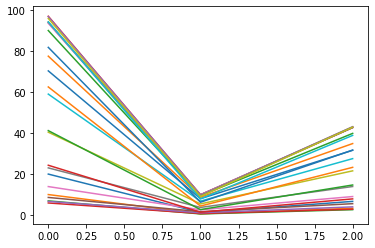

In [77]:
from matplotlib import pyplot as plt
plt.plot(centers)

------------------------------------------------------------------

--------------------------------------------------------------------------------